**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math as ma

def media(img, n, m):

    mat = np.zeros((n, m))
    
    tam = n * m

    mat[::] = (float)(1.0 / tam)

    return filtragem(img, mat, False)

def filtragem(img, mat, inv):

    lin = img.shape[0]    
    col = img.shape[1]

    n = mat.shape[0]
    m = mat.shape[1]

    if(n % 2 != 0 and m % 2 != 0):

        a = (int)((n - 1) / 2)
        b = (int)((m - 1) / 2)
        
        img_pad = np.zeros((lin + 2 * a, col + 2 * b))
        img_pad[a:lin+a,a:col+a] = img

        img2 = np.zeros((lin, col))

        if(inv == False):

            x = (int)(a)
            while(x < lin + a):
                y = (int)(b)
                while(y < col + b):
                    s = (int)(-a)
                    while(s <= a):
                        t = (int)(-b)
                        while(t <= b):
                            img2[x - a, y - b] += img_pad[x + s, y + t] * mat[s + a, t + b]
                            t += 1
                        s += 1
                    y += 1
                x += 1

        else:

            x = (int)(a)
            while(x < lin + a):
                y = (int)(b)
                while(y < col + b):
                    s = (int)(-a)
                    while(s <= a):
                        t = (int)(-b)
                        while(t <= b): 
                            img2[x - a, y - b] += img_pad[x - s, y - t] * mat[s + a, t + b]
                            t += 1
                        s += 1
                    y += 1
                x += 1

    else:

        img_pad = np.zeros((lin + n, col + m))
        img_pad[0:lin,0:col] = img

        img2 = np.zeros((lin, col))

        if(inv == False):

            x = (int)(0)
            while(x < lin):
                y = (int)(0)
                while(y < col):
                    s = (int)(0)
                    while(s < n):
                        t = (int)(0)
                        while(t < m):
                            img2[x, y] += img_pad[x + s, y + t] * mat[s, t]
                            t += 1
                        s += 1
                    y += 1
                x += 1

        else:

            x = (int)(0)
            while(x < lin):
                y = (int)(0)
                while(y < col):
                    s = (int)(0)
                    while(s < n):
                        t = (int)(0)
                        while(t < m): 
                            img2[x, y] += img_pad[x + ((n - 1) - s), y + ((m - 1) - t)] * mat[s, t]
                            t += 1
                        s += 1
                    y += 1
                x += 1
        
    return img2

1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

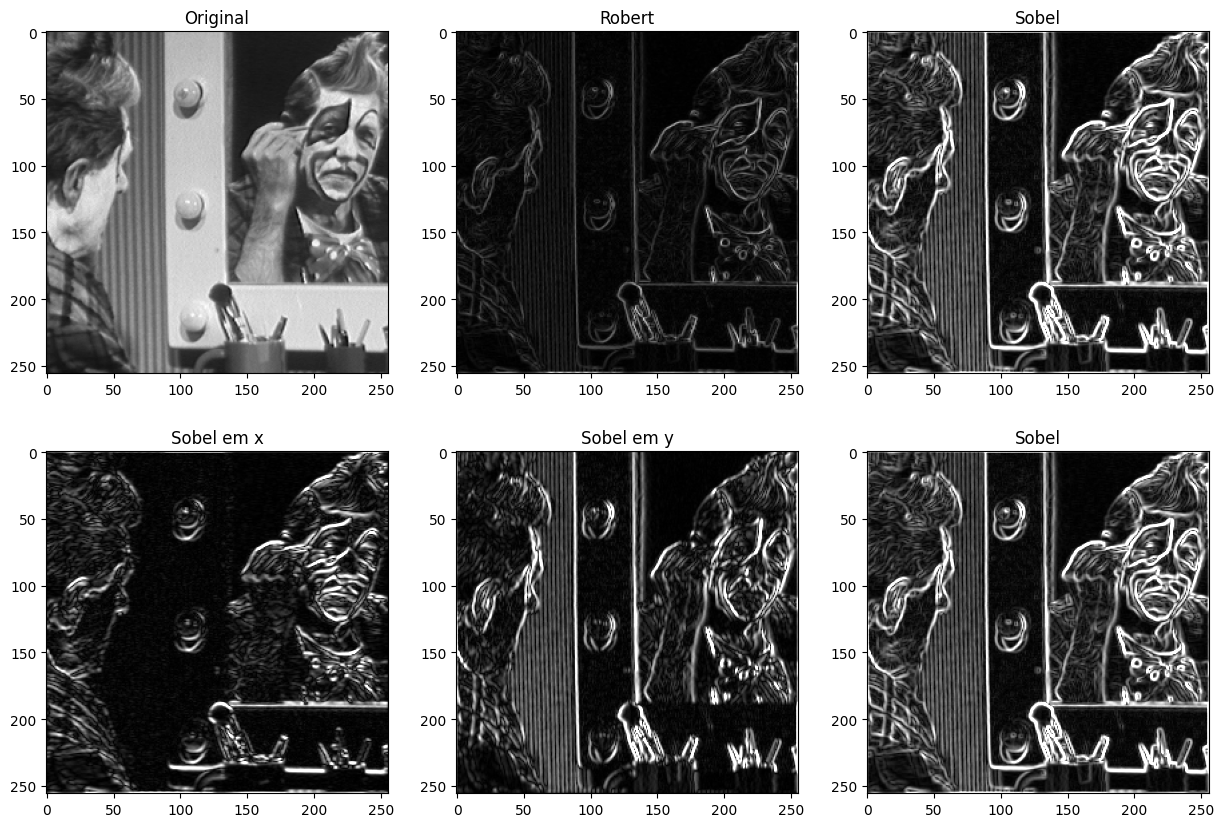

In [75]:
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

h1 = np.matrix([[1,0],[0,-1]])
h2 = np.matrix([[0,1],[-1,0]])
img2 = (np.sqrt(filtragem(img1, h1, False)**2 + filtragem(img1, h2, False)**2)).astype(int)

h1 = np.matrix([[-1,-1,-1],[0,0,0],[1,1,1]])
h2 = np.matrix([[-1,0,1],[-1,0,1],[-1,0,1]])
img3 = (np.sqrt(filtragem(img1, h1, False)**2)).astype(int)
img4 = (np.sqrt(filtragem(img1, h2, False)**2)).astype(int)
img5 = (np.sqrt(filtragem(img1, h1, False)**2 + filtragem(img1, h2, False)**2)).astype(int)

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,2)
plt.title('Robert')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,3)
plt.title('Sobel')
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,4)
plt.title('Sobel em x')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,5)
plt.title('Sobel em y')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,6)
plt.title('Sobel')
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)




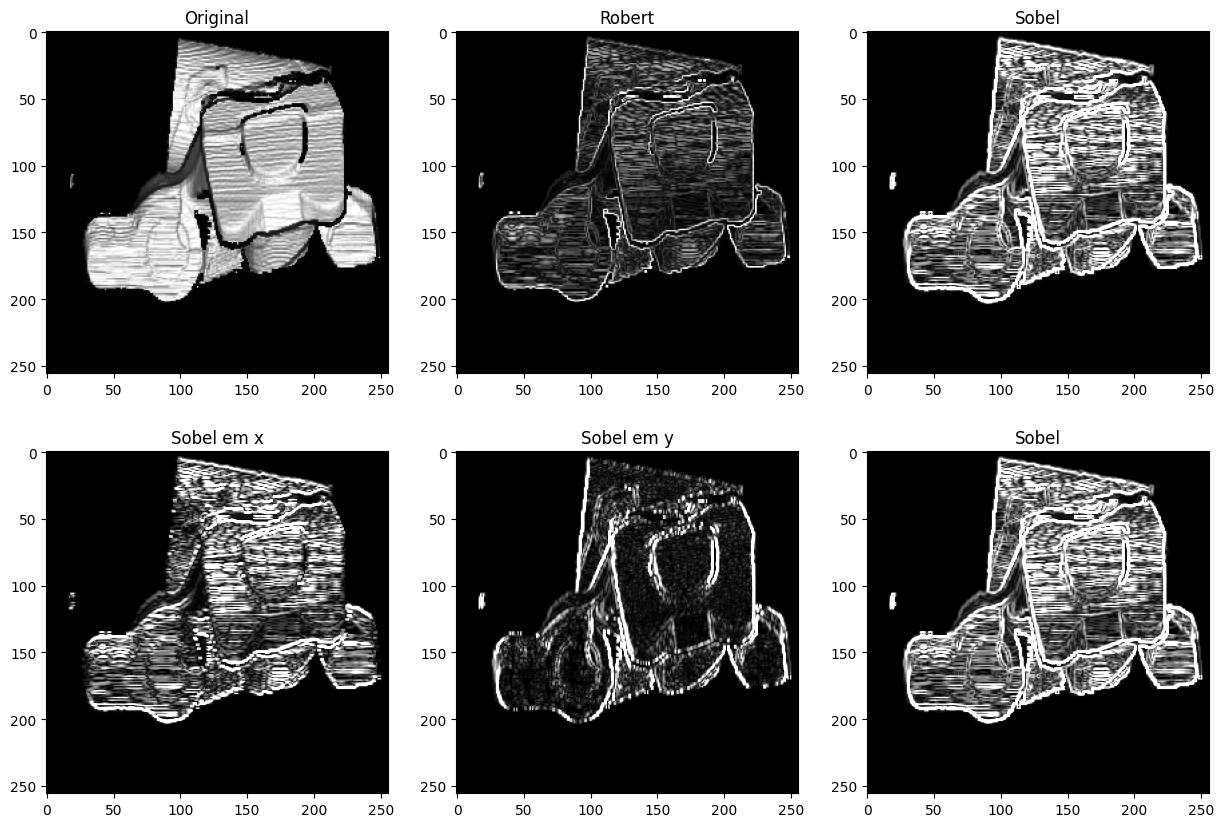

In [76]:
# code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

h1 = np.matrix([[1,0],[0,-1]])
h2 = np.matrix([[0,1],[-1,0]])
img2 = (np.sqrt(filtragem(img1, h1, False)**2 + filtragem(img1, h2, False)**2)).astype(int)

h1 = np.matrix([[-1,-1,-1],[0,0,0],[1,1,1]])
h2 = np.matrix([[-1,0,1],[-1,0,1],[-1,0,1]])
img3 = (np.sqrt(filtragem(img1, h1, False)**2)).astype(int)
img4 = (np.sqrt(filtragem(img1, h2, False)**2)).astype(int)
img5 = (np.sqrt(filtragem(img1, h1, False)**2 + filtragem(img1, h2, False)**2)).astype(int)

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,2)
plt.title('Robert')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,3)
plt.title('Sobel')
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,4)
plt.title('Sobel em x')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,5)
plt.title('Sobel em y')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,6)
plt.title('Sobel')
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)


2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

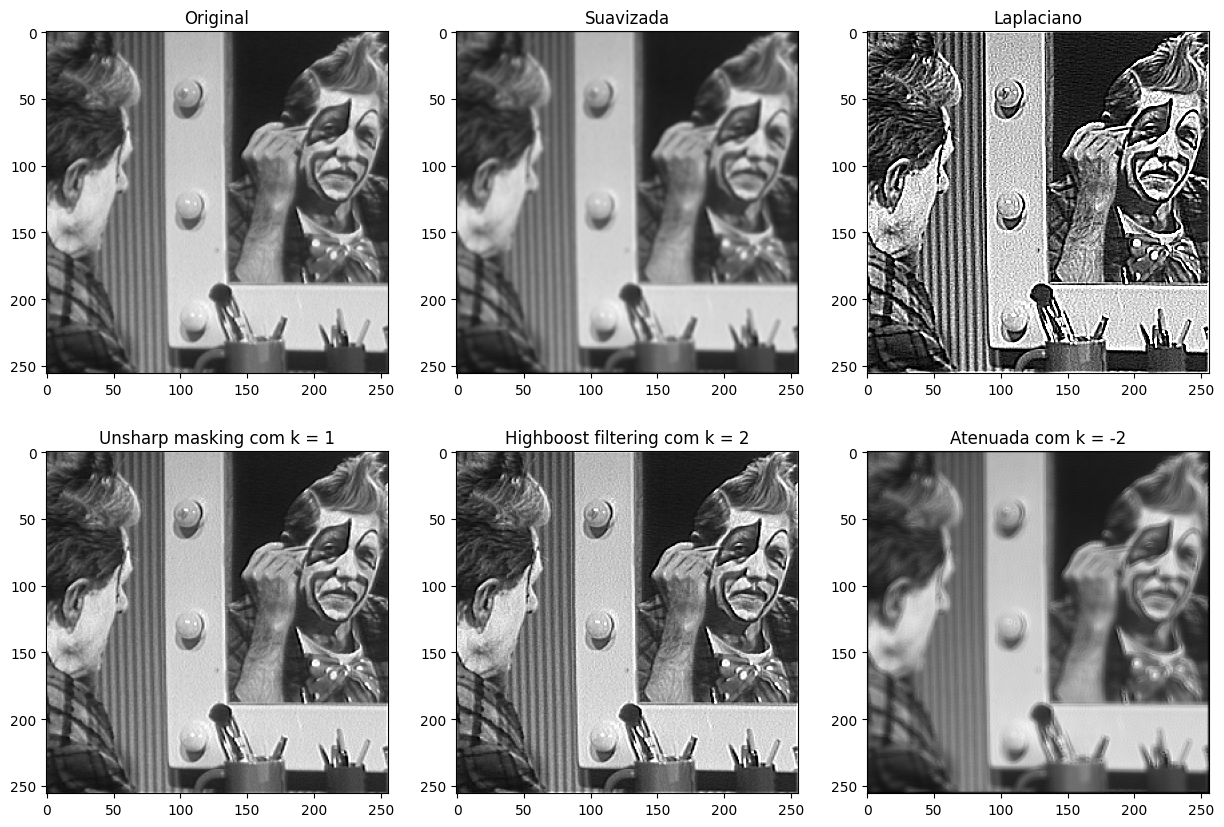

In [77]:
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img6 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

img2 = media(img1, 3, 3)

mat = np.matrix([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img3 = filtragem(img1, mat, False).astype(int)

img4 = img1 - img2
img4 = img1 + img4

img5 = img1 - img2
img5 = img1 + 2 * img5

img6 = img1 - img2
img6 = img1 - 2 * img6

plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,2)
plt.title('Suavizada')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,3)
plt.title('Laplaciano')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,4)
plt.title('Unsharp masking com k = 1')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,5)
plt.title('Highboost filtering com k = 2')
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,3,6)
plt.title('Atenuada com k = -2')
plt.imshow(img6, cmap='gray', vmin=0, vmax=255)




3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

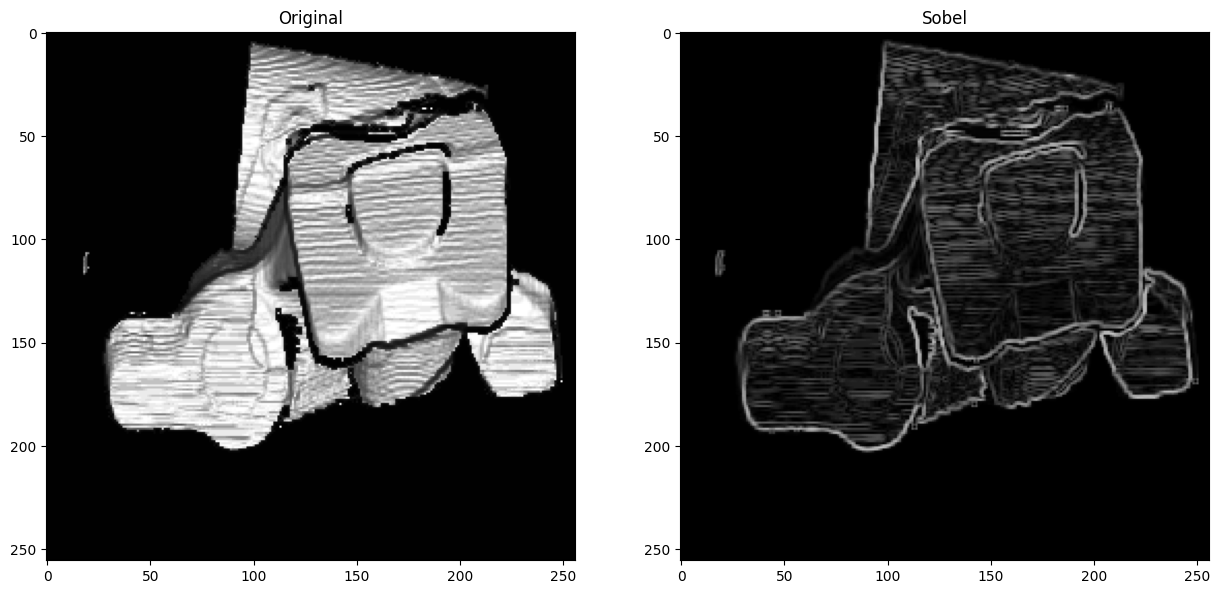

In [78]:
# code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

h1 = np.matrix([[-1,-1,-1],[0,0,0],[1,1,1]])
h2 = np.matrix([[-1,0,1],[-1,0,1],[-1,0,1]])
img2 = (np.sqrt(filtragem(img1, h1, False)**2 + filtragem(img1, h2, False)**2) * 0.25).astype(int)

plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Sobel')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

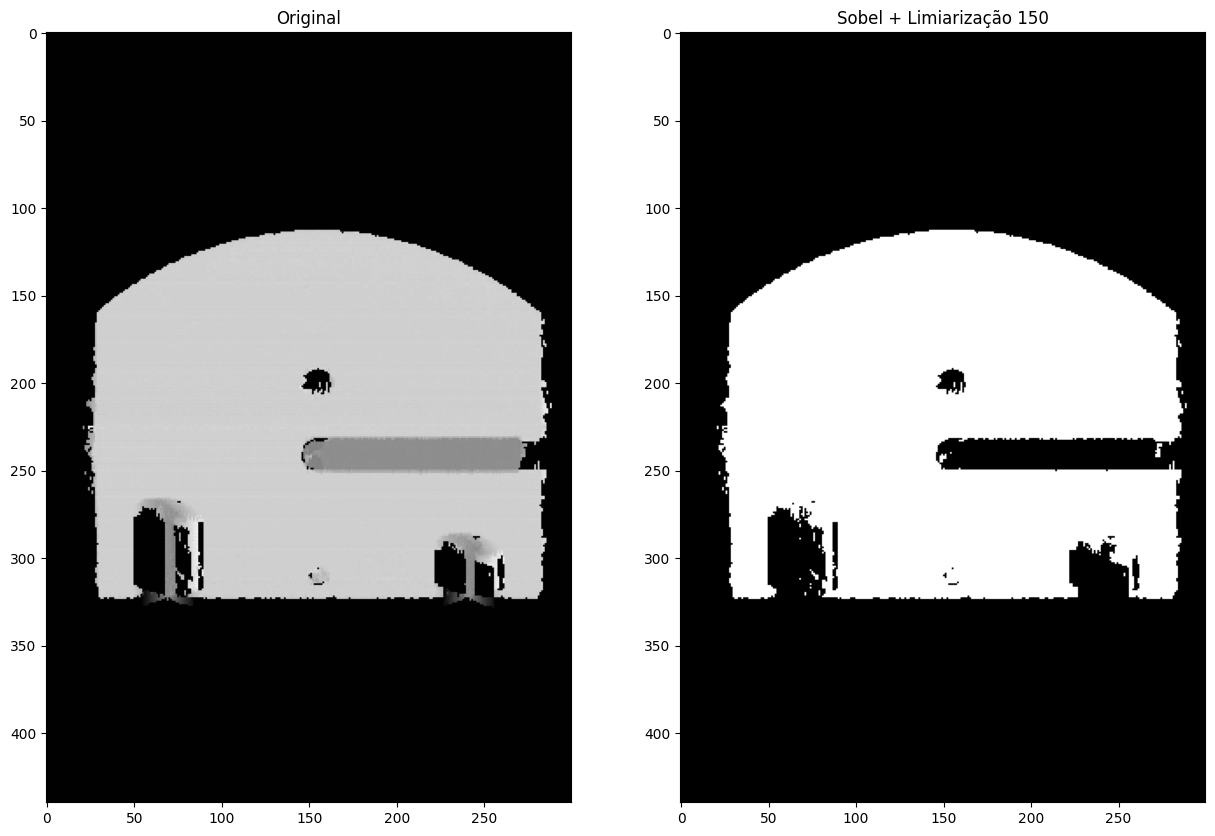

In [79]:
# code here
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

h1 = np.matrix([[-1,-1,-1],[0,0,0],[1,1,1]])
h2 = np.matrix([[-1,0,1],[-1,0,1],[-1,0,1]])
img2 = (np.sqrt(filtragem(img1, h1, False)**2 + filtragem(img1, h2, False)**2) * 0.25).astype(int)

lim = 1.0 / 150.0;

img2 = ((lim * img1).astype(int)) * 255;

plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Sobel + Limiarização 150')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

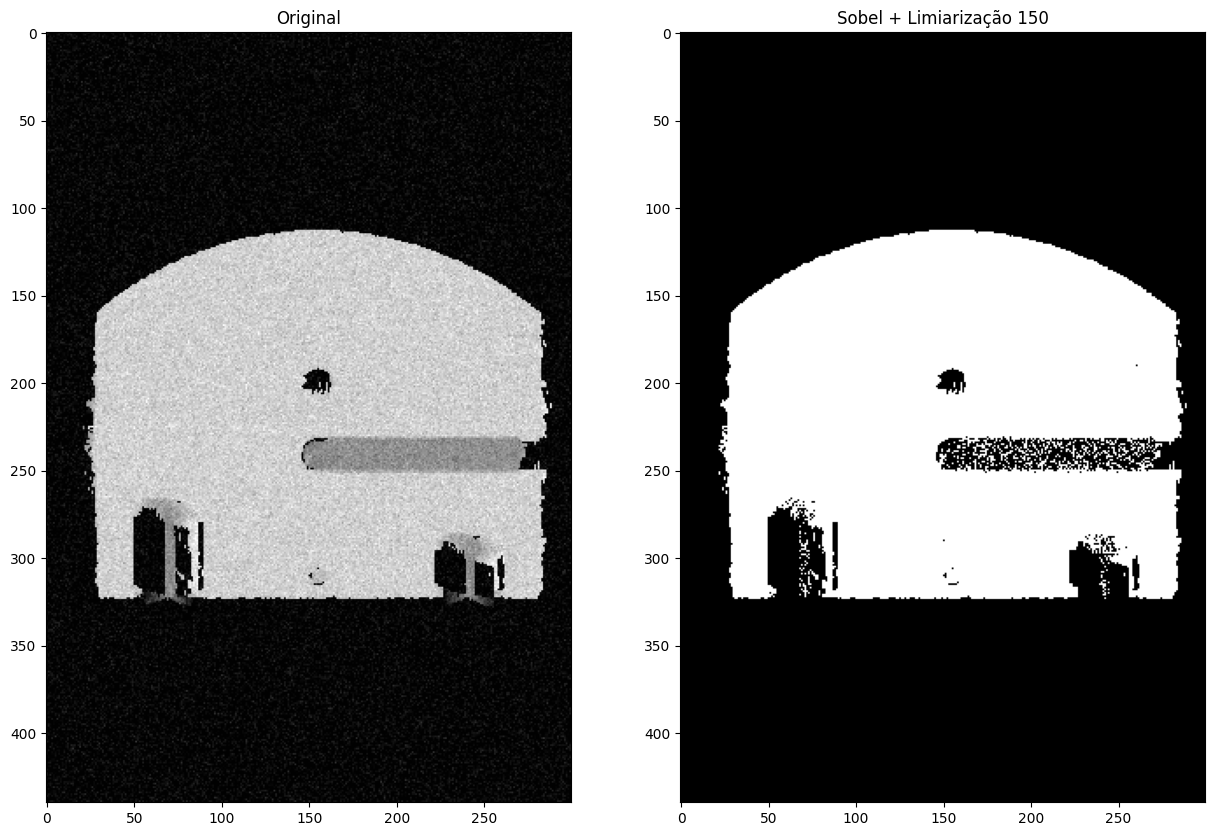

In [80]:
# code here
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

h1 = np.matrix([[-1,-1,-1],[0,0,0],[1,1,1]])
h2 = np.matrix([[-1,0,1],[-1,0,1],[-1,0,1]])
img2 = (np.sqrt(filtragem(img1, h1, False)**2 + filtragem(img1, h2, False)**2) * 0.25).astype(int)

lim = 1.0 / 150.0;

img2 = ((lim * img1).astype(int)) * 255;

plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.title('Sobel + Limiarização 150')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)